# DSI 16 Project 4 

## Part 2: Exploratory Data Analysis

By Alexis, Alyse, Dylan and Wei Tian

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
from sklearn import ensemble, preprocessing
from datetime import datetime, timedelta, date

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_roc_curve, plot_confusion_matrix, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import warnings

warnings.simplefilter(action='ignore')

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
sns.set_style("darkgrid")
sns.set_palette("Spectral")

# EDA

In [4]:
# Import train, test, weather datasets

df = pd.read_csv('../datasets/processed/train_cleaned_eda.csv')
test = pd.read_csv('../datasets/processed/test_cleaned_modeling.csv')
weather = pd.read_csv('../datasets/processed/weather_cleaned.csv')
spray = pd.read_csv('../datasets/processed/spray_cleaned_eda.csv')
train = pd.read_csv('../datasets/processed/train_cleaned_modeling.csv')

In [5]:
df.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,numbins,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.731922, -87.677512)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.95469, -87.800991)",1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.974089, -87.824812)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T048,41.867108,-87.654224,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.867108, -87.654224)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,CULEX PIPIENS/RESTUANS,T050,41.919343,-87.694259,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.919343, -87.694259)",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
weather.head()

,Unnamed: 0,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,depth,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,week,year,trange,dayhrs,HZ,GR,SQ,TSRA,BR,BCFG,SN,RA,DZ,MIFG,FU,VCTS,VCFG,FG+,TS,FG,rain
0,0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,,0,0.0,29.10,29.82,1.7,27,9.2,5,18,2007,33,14.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,M,0.0,29.18,29.82,2.7,25,9.6,5,18,2007,32,14.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,BR,0,0.0,29.38,30.09,13.0,4,13.4,5,18,2007,17,14.050000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,BR HZ,M,0.0,29.44,30.08,13.3,2,13.4,5,18,2007,17,14.050000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0,0.0,29.39,30.12,11.7,7,11.9,5,18,2007,20,14.083333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Tracking WNV Presence Over Time

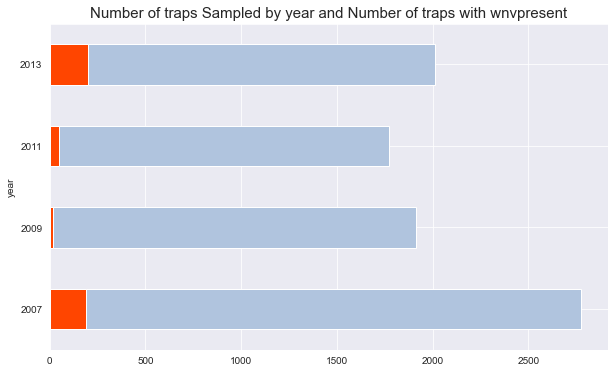

In [7]:
# Plot the number of traps taken each year and positive traps

plt.figure(figsize=(10,6))
df.groupby('year')['trap'].count().plot(kind='barh',color='lightsteelblue');
df.groupby('year')['wnvpresent'].sum().plot(kind='barh',color='orangered');
plt.title('Number of traps Sampled by year and Number of traps with wnvpresent',fontsize=15);

Overall, the rates of the West Nile Virus appearing in the samples taken were the highest in 2007 and 2013, and these were also the years with the highest number of samples taken in total.

In [8]:
# Number of rows per year
df.groupby(['year','month'])['trap'].count()

year  month
2007  5          25
      6         175
      7         457
      8        1266
      9         651
      10        201
2009  5          56
      6         469
      7         621
      8         325
      9         381
      10         63
2011  6         314
      7         529
      8         448
      9         482
2013  6         379
      7         489
      8         711
      9         433
Name: trap, dtype: int64

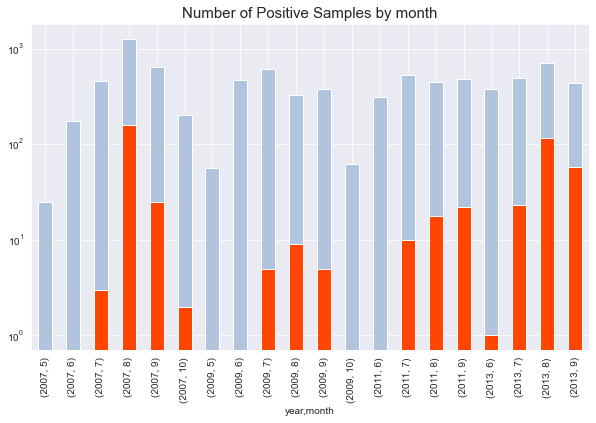

In [9]:
plt.figure(figsize=(10,6))

df.groupby(['year','month'])['trap'].count().plot(kind='bar',color='lightsteelblue');
df.groupby(['year','month'])['wnvpresent'].sum().plot(kind='bar',color='orangered');
plt.title("Number of Positive Samples by month",fontsize=15);
plt.yscale('log')
# subplot of percentage of wnvpresent

In [10]:
month_year_2 = pd.pivot_table(df,index=['month'],columns=['year'], values = 'wnvpresent')
month_year_2 = month_year_2.fillna(0)

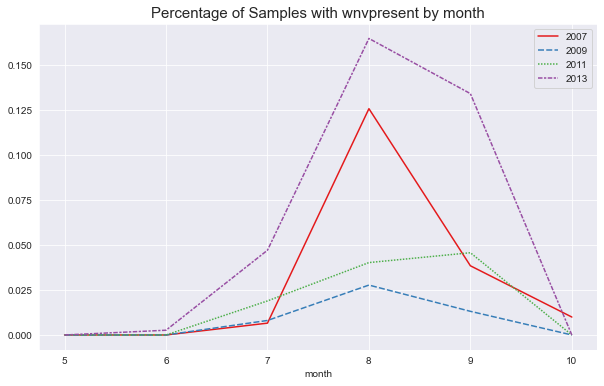

In [11]:
plt.figure(figsize=(10,6))
sns.lineplot(data=month_year_2,palette='Set1');
plt.title('Percentage of Samples with wnvpresent by month',fontsize=15);

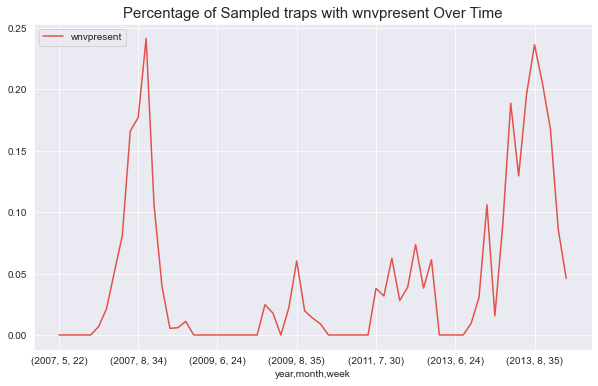

In [12]:
pd.pivot_table(df,columns=['year','month','week'],values = 'wnvpresent').T.plot(kind='line',figsize=(10,6));
plt.title("Percentage of Sampled traps with wnvpresent Over Time", fontsize=15);

We can see definitive seasonality trends for the occurrence of the WNV in mosquito samples, where August tends to have the highest rates of the virus occurring. The rates were highest in 2007 and 2013.

We also want to look at our weather data in relation to our trap data. There are 2 weather stations that take entries for every day from May to October each year:

- Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
- Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

In [13]:
# Create variables for station location data
stations = pd.DataFrame(data = [['Station 1: Chicago O\'Hare', 41.995, -87.933],
                                ['Station 2: Chicago Midway', 41.786, -87.752]], 
                        columns = ['station', 'latitude', 'longitude'])

stations

,station,latitude,longitude
0,Station 1: Chicago O'Hare,41.995,-87.933
1,Station 2: Chicago Midway,41.786,-87.752


In [14]:
origin = [41.6, -88.0]              # lat/long of origin (lower left corner)
upperRight = [42.1, -87.5]          # lat/long of upper right corner

In [15]:
mapdata = np.loadtxt("../datasets/source/mapdata.txt")

In [16]:
from ipywidgets import interact, IntSlider,widgets
%matplotlib inline

In [17]:
# Function to get metrics by year
def trap_metrics(df):
    d = {}
    d['nummosquitos'] = df['nummosquitos'].sum()
    d['numtests'] = df['trap'].count()
    d['wnvpresent'] = df['wnvpresent'].sum()
    d['numbins']=df['numbins'].sum()
    return pd.Series(d, index=['nummosquitos','wnvpresent','numtests','numbins'])

In [18]:
# Function to plot traps by year
def plot_year_info(yr):
    if yr != 'All':
        data_year = df[df['year'] == yr]
    else:
        data_year = df
    
    data_gb = data_year.groupby(['trap','latitude','longitude']).apply(trap_metrics).reset_index()
    data_gb

    lats = data_gb['latitude']
    longs = data_gb['longitude']

    station_lat = stations['latitude']
    station_long = stations['longitude']

    plt.figure(figsize=(15,12))

    style = dict(size=12, weight='bold')

    # generate plot
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=longs, y=lats, c='w', s=data_gb['numtests']*5,label='Number of Samples')
    plt.scatter(x=longs, y=lats, c='r', s=data_gb['wnvpresent']*5,label='WNV Present')
    plt.scatter(x=station_long, y=station_lat, c='b', marker = 's',s=40)
    plt.text(station_long[0] + 0.005, station_lat[0]+ 0.005, stations['station'][0], **style)
    plt.text(station_long[1] + 0.005, station_lat[1]+ 0.005, stations['station'][1], **style)
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.legend()
    plt.title('Number of Samples Drawn and Positive Samples for Each trap ' + str(yr),fontsize=18);

In [19]:
slider = [2007, 2009, 2011, 2013, 'All']

interact(plot_year_info,yr=slider);

interactive(children=(Dropdown(description='yr', options=(2007, 2009, 2011, 2013, 'All'), value=2007), Output(…

We can see that some of the traps have never had any mosquitos with the WNV detected. This is where our clustering of traps will become useful. 

## Clustering Traps by Latitude and Longitude

Traps in relative proximity to each other are clustered in this section to reflect the unseen effects of topography in the area on the presence of West Nile Virus. Clusters will also serve as an indicator of the West Nile Virus spreading.

In [20]:
train_filtered = df[['trap', 'latitude','longitude','year']].copy()
test_filtered = test[['trap', 'latitude','longitude','year']].copy()

In [21]:
train_filtered['df'] = 'train'
test_filtered['df'] = 'test'

In [22]:
data = train_filtered.append(test_filtered)

In [23]:
data = data.groupby(['df','trap','latitude','longitude'])['year'].count().reset_index()

In [24]:
data.shape

(289, 5)

In [25]:
data_flatten = data.groupby(['trap','latitude','longitude'])['year'].count().reset_index()

data_flatten = data_flatten.drop(columns='year')

In [26]:
data_flatten.shape

(151, 3)

In [27]:
# Create cmap to plot clusters
cmap = plt.cm.get_cmap('gist_rainbow')

In [28]:
# Function to scale data
def scale_data(X_data):
    X = X_data.copy()
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X)
    return X_scaled

In [29]:
# Function to plot clusters after fitting X with defined parameters
def plot_clusters(X_data, cl):
    
    X_scaled = scale_data(X_data)
    
    cl.fit(X_scaled)
    
    df = pd.DataFrame(X_data)
    df['ClusterIDs'] = cl.labels_
    clusters = df['ClusterIDs'].unique().tolist()
    color_dict = {j: cmap(i/len(clusters)) for i,j in enumerate(clusters,start=1)}
    if -1 in clusters:
        color_dict[-1] = 'k'
    df['color'] = df['ClusterIDs'].map(color_dict)
    
    
    cluster_list = cl.labels_
    sil = silhouette_score(X_scaled, cluster_list)
    print(f'Silhouette Score: {sil}')
    print('Number of Clusters: ' + str(len(clusters)) )
    
    lats = df['latitude']
    longs = df['longitude']
    
    plt.figure(figsize=(15,12))

    # generate plot
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=longs, y=lats, c=df['color'],alpha=0.5)
    plt.title('Clusters Generated for ' + str(cl),fontsize=18);

    return df, cl # Return the dataframe with cluster labels and the cluster method object

In [30]:
#KMeans Sil Score GridSearch

def kmeans_gridsearch(X_data, n_clusters_range):
    X_scaled = scale_data(X_data)
    gs_df = pd.DataFrame()
    gs_df['n_clusters'] = n_clusters_range
    sil_scores = []
    for x in n_clusters_range:
        km = KMeans(n_clusters = x, random_state=42)
        km.fit(X_scaled)
        sil = silhouette_score(X_scaled, km.labels_)
        sil_scores.append(sil)
    gs_df['sil'] = sil_scores
    best_score = gs_df.sort_values(by='sil',ascending=False).reset_index()
    highest = best_score['sil'][0]
    highest_n = best_score['n_clusters'][0]
    print(f'The best silhouette score is {highest} with {highest_n} clusters.')
    return gs_df.sort_values(by='sil',ascending=False)

In [31]:
km_gs = kmeans_gridsearch(data_flatten[['latitude','longitude']], 
                          list(range(2,100, 1)))

The best silhouette score is 0.46363014099222677 with 2 clusters.


In [32]:
km_gs

,n_clusters,sil
0,2,0.463630
2,4,0.437886
1,3,0.416119
4,6,0.413671
28,30,0.410127
43,45,0.409382
47,49,0.407772
45,47,0.406213
46,48,0.405917
57,59,0.403950


Silhouette Score: 0.4101274757319084
Number of Clusters: 30


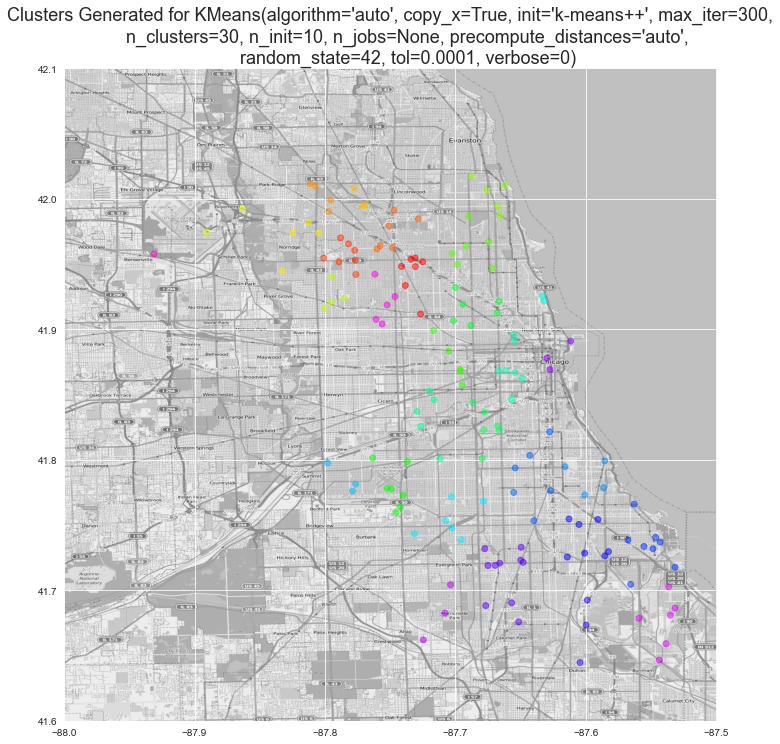

In [33]:
# Plotting colour-coded trap locations on map
km_df, km_cl = plot_clusters(data_flatten[['latitude','longitude']], KMeans(n_clusters=30, random_state=42))

In [34]:
traps_clusters = pd.merge(data, km_df, on = ['latitude','longitude'])

In [35]:
traps_clusters = traps_clusters.drop(columns=['year','color'])

In [36]:
traps_clusters_train = traps_clusters[traps_clusters['df'] == 'train']
traps_clusters_test = traps_clusters[traps_clusters['df'] == 'test']

# Weather EDA

In [37]:
weather.head()

,Unnamed: 0,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,depth,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,week,year,trange,dayhrs,HZ,GR,SQ,TSRA,BR,BCFG,SN,RA,DZ,MIFG,FU,VCTS,VCFG,FG+,TS,FG,rain
0,0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,,0,0.0,29.10,29.82,1.7,27,9.2,5,18,2007,33,14.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,M,0.0,29.18,29.82,2.7,25,9.6,5,18,2007,32,14.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,BR,0,0.0,29.38,30.09,13.0,4,13.4,5,18,2007,17,14.050000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,BR HZ,M,0.0,29.44,30.08,13.3,2,13.4,5,18,2007,17,14.050000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0,0.0,29.39,30.12,11.7,7,11.9,5,18,2007,20,14.083333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
weather['yr_mth'] = pd.to_datetime(weather['date']).apply(lambda x: '{}-{:02d}'.format(x.year, x.month))
weather.head()

,Unnamed: 0,station,date,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,codesum,depth,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,month,week,year,trange,dayhrs,HZ,GR,SQ,TSRA,BR,BCFG,SN,RA,DZ,MIFG,FU,VCTS,VCFG,FG+,TS,FG,rain,yr_mth
0,0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,,0,0.0,29.10,29.82,1.7,27,9.2,5,18,2007,33,14.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05
1,1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,,M,0.0,29.18,29.82,2.7,25,9.6,5,18,2007,32,14.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05
2,2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,BR,0,0.0,29.38,30.09,13.0,4,13.4,5,18,2007,17,14.050000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2007-05
3,3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,BR HZ,M,0.0,29.44,30.08,13.3,2,13.4,5,18,2007,17,14.050000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2007-05
4,4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,,0,0.0,29.39,30.12,11.7,7,11.9,5,18,2007,20,14.083333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2007-05


### Understanding Weather Trends Across Time

In [39]:
def subplot_barplot(x,y):
    fig, ax = plt.subplots(2, 1,figsize=(15,10)) 
    sns.barplot(data=weather[(weather['station']==1)], x=x,y=y,label = "Station 1",
                            ax=ax[0]) 
    sns.barplot(data=weather[(weather['station']==2)], 
                            x=x,y=y,label = "Station 2",
                            ax=ax[1]) 
    ax[0].set_xlabel('year/month', fontsize=12)
    ax[0].set_ylabel(y, fontsize=12)
    
    ax[1].set_xlabel('year/month', fontsize=12)
    ax[1].set_ylabel(y, fontsize=12)

    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

    ax[0].set_title("Station 1 monthly"+str(f' {y}'),fontdict={'fontsize': 15})
    ax[1].set_title("Station 2 monthly"+str(f' {y}'),fontdict={'fontsize': 15})
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

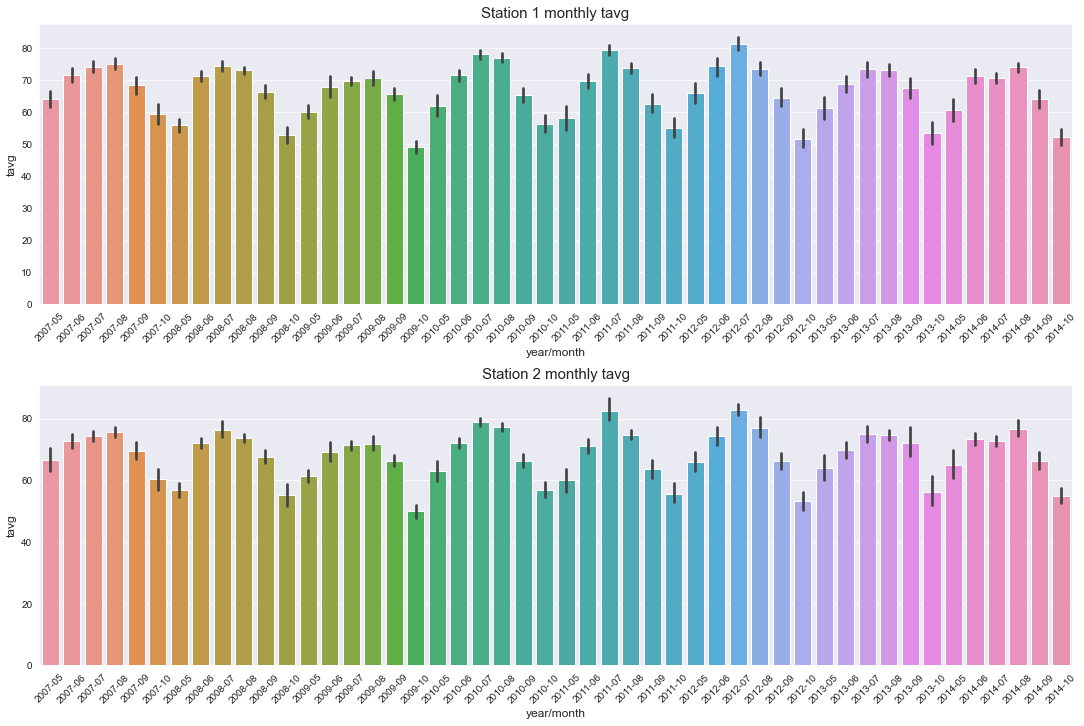

In [40]:
subplot_barplot('yr_mth','tavg')

**Observations**
- We observe that the highest average temperature are generally in August. 
- However, for 2010-2012, highest average temperature were recorded in July instead.

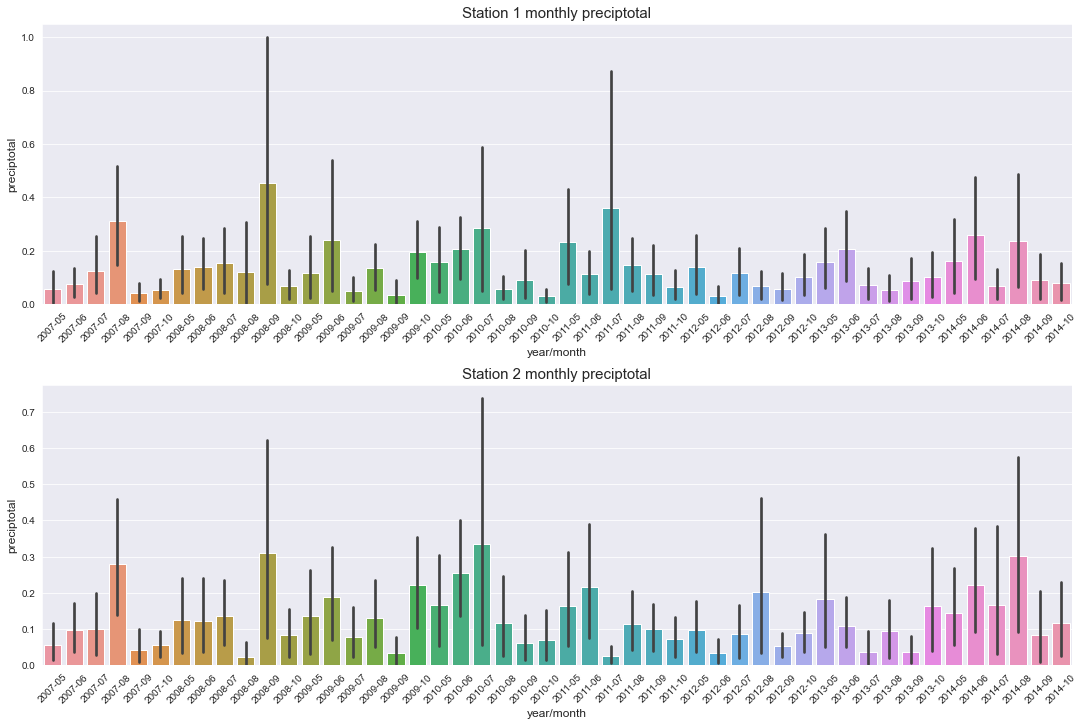

In [41]:
subplot_barplot('yr_mth','preciptotal')

**Observations**
- Precipitation peaks in July/August period every year. 
- 2013 appears to be a strange year with exceptionally low precipitation, even during August-September period. 

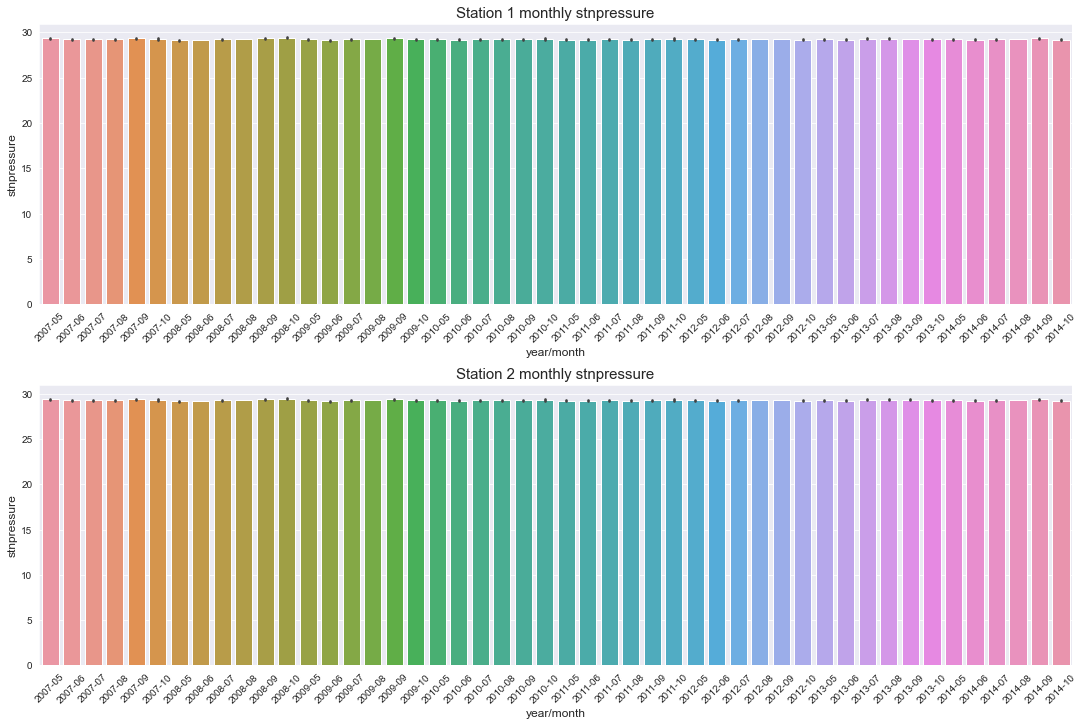

In [42]:
subplot_barplot('yr_mth','stnpressure')

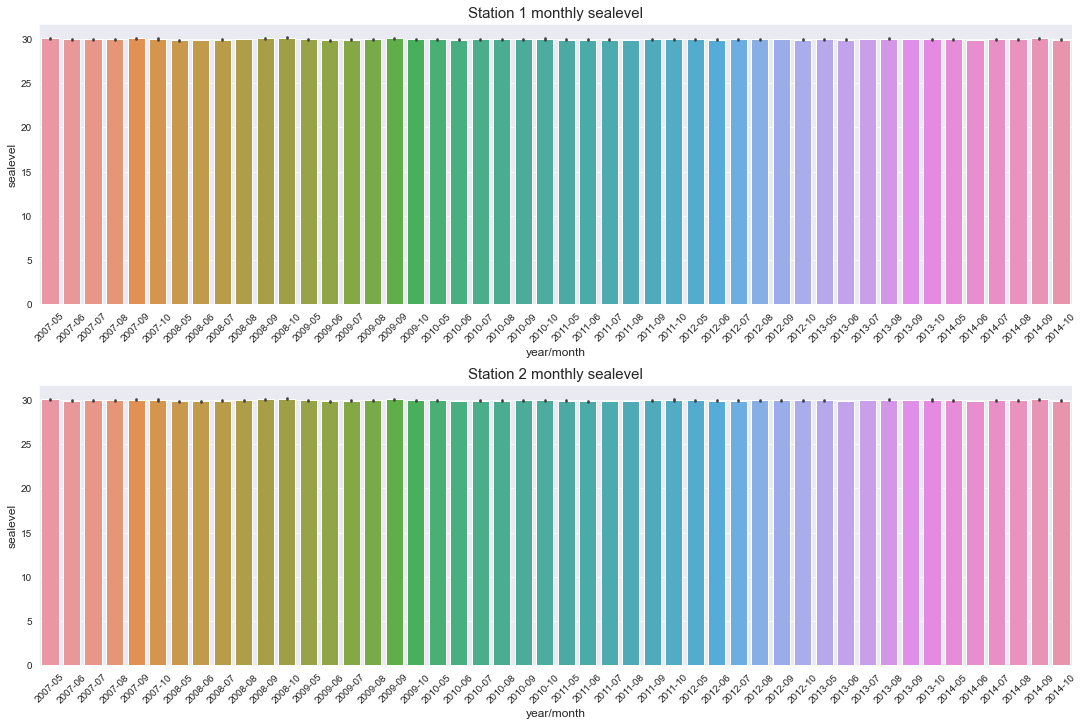

In [43]:
subplot_barplot('yr_mth','sealevel')

**Observations**
- Sealevel and Stnpressure are not important in our analysis as they do not differ across time periods.
- We will drop these two columns

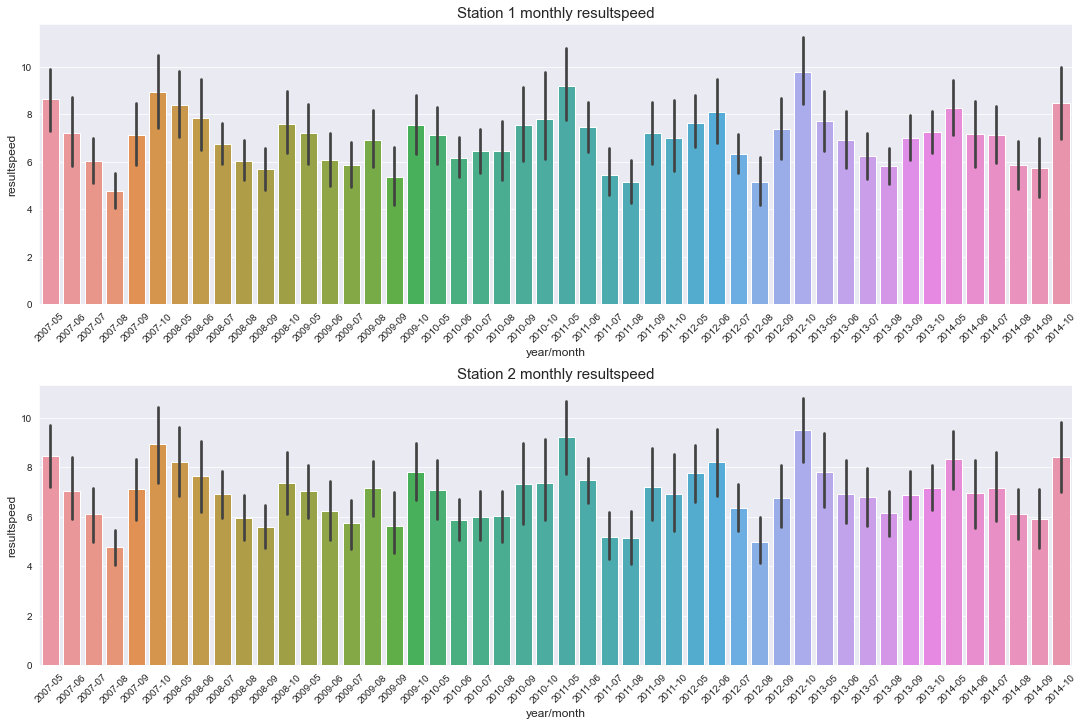

In [44]:
subplot_barplot('yr_mth','resultspeed')

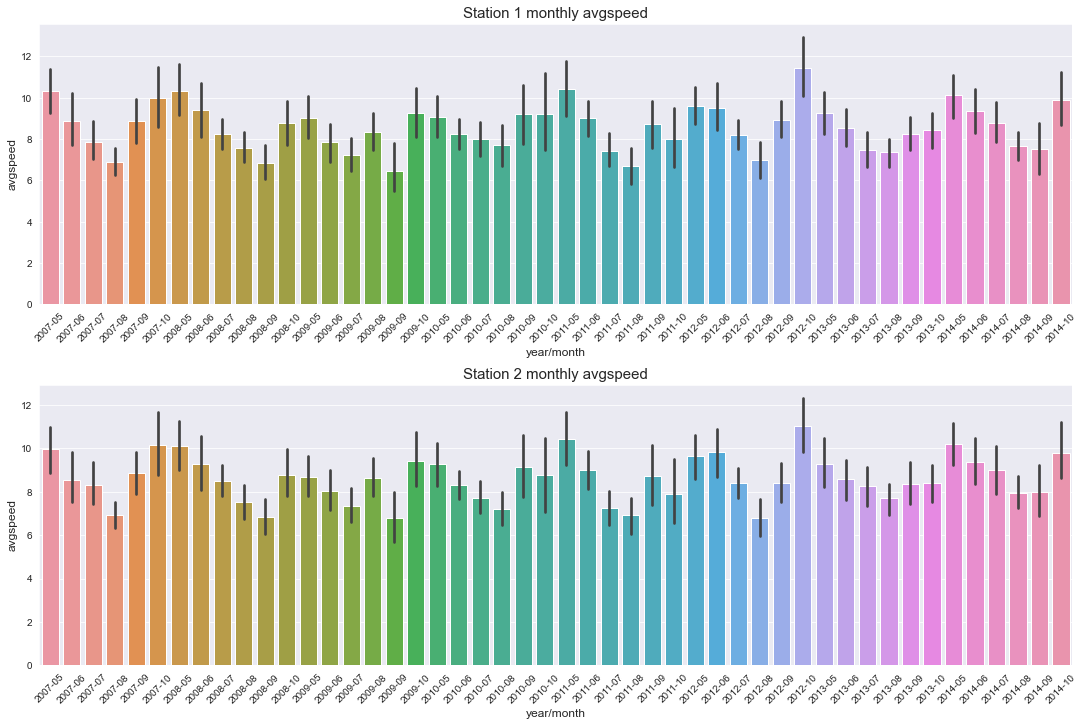

In [45]:
subplot_barplot('yr_mth','avgspeed')

**Observations**
- Interestingly, the lowest average 'avgspeed' and 'resultspeed' corresponds with the highest temperature/precipitation months (July-August).

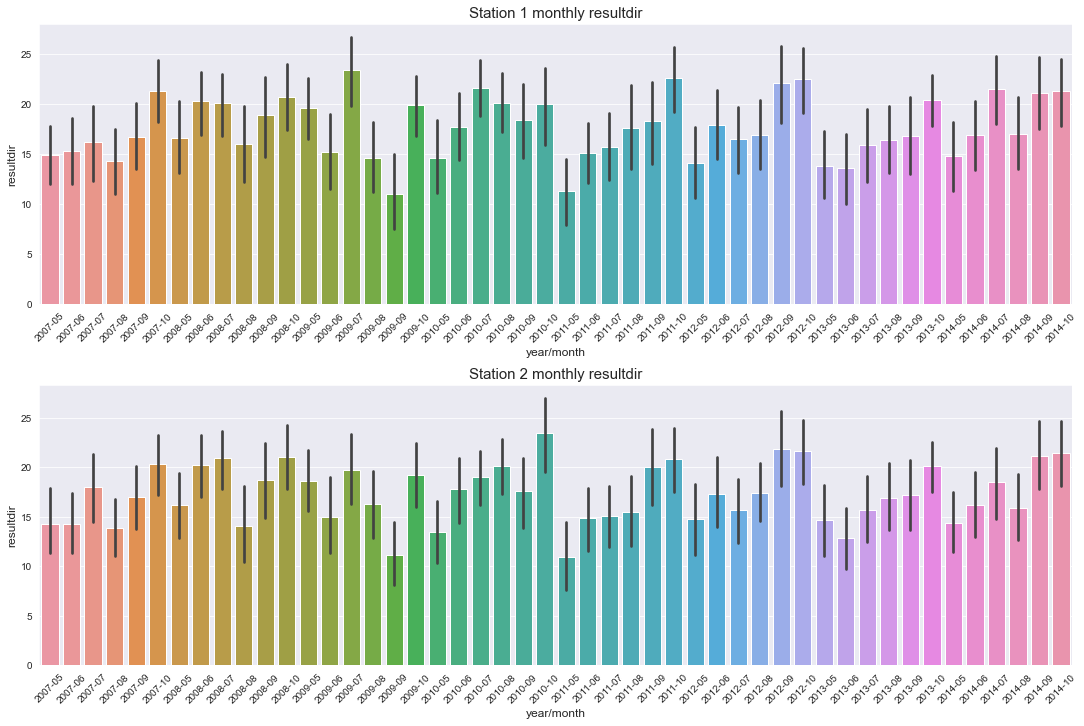

In [46]:
subplot_barplot('yr_mth','resultdir')

**Observations**
- The lowest resultdir are generally in May period. 
- The highest resultdir are generally in October period.

### Weather Data Cross Comparison

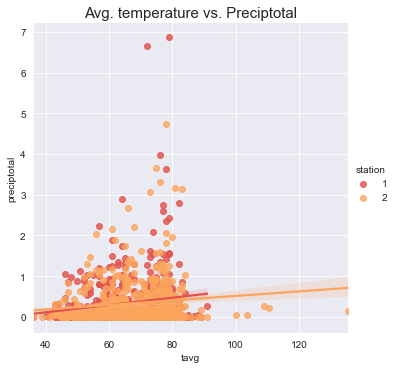

In [47]:
sns.lmplot(data=weather[weather['rain']==True],y='preciptotal',x='tavg',hue='station')
plt.title('Avg. temperature vs. Preciptotal',fontdict={'fontsize': 15});

There appears to be a slight trend that higher temperature corresponds to higher rainfall.

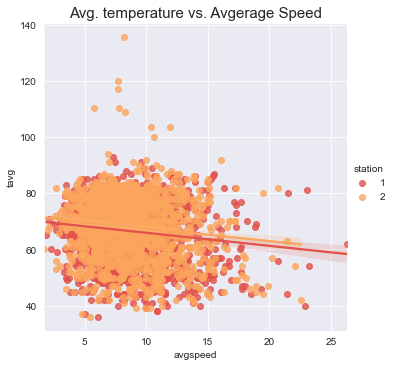

In [48]:
sns.lmplot(data=weather,y='tavg',x='avgspeed',hue='station')
plt.title('Avg. temperature vs. Avgerage Speed',fontdict={'fontsize': 15});

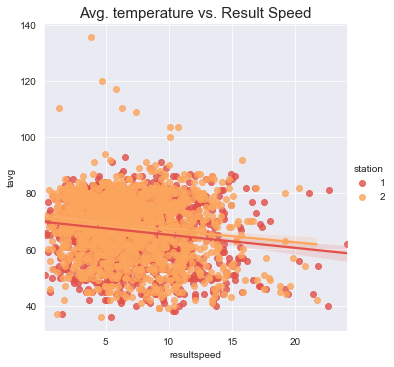

In [49]:
sns.lmplot(data=weather,y='tavg',x='resultspeed',hue='station')
plt.title('Avg. temperature vs. Result Speed',fontdict={'fontsize': 15});

**Observations**
- Negative trend observed for temperature versus resultspeed/avgspeed (windspeed).

In [50]:
#fig,ax = plt.subplots()
def cross_comparison(y1,y2,title):
    plt.figure(figsize=(20,8))
    sns.lineplot(data=weather[weather['station']==1],x='yr_mth',y=y1,label = "Station 1 Temperature")
    sns.lineplot(data=weather[weather['station']==2],x='yr_mth',y=y1,label = "Station 2 Temperature")
    plt.xlabel('year/month', fontsize=18)
    plt.ylabel(y1, fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.xticks(rotation=45)
    plt.legend(fontsize=20)

    ax2=plt.twinx()
    sns.barplot(data=weather[(weather['station']==1)&(weather['rain']==True)],x='yr_mth',y=y2,label = "Station 1",ax=ax2)
    sns.barplot(data=weather[(weather['station']==2)&(weather['rain']==True)],x='yr_mth',y=y2,label = "Station 2",ax=ax2)

    ax2.set_ylabel(y2,fontsize=20)

    plt.title(title,fontdict={'fontsize':20});

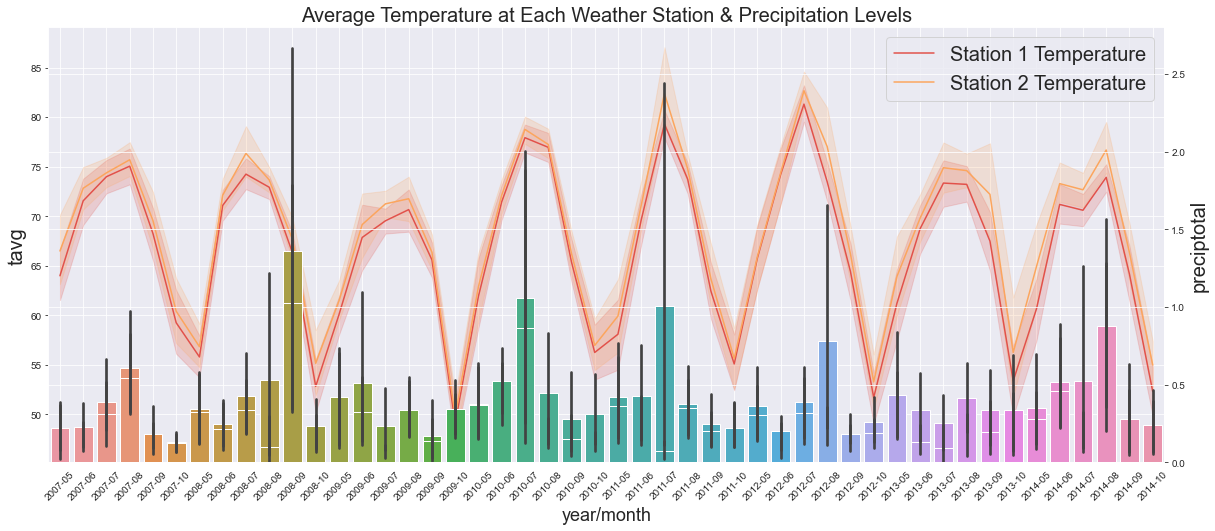

In [51]:
cross_comparison('tavg','preciptotal',"Average Temperature at Each Weather Station & Precipitation Levels")

- Temperature peaks at August every single year. We observe the highest average temperature in 2011 and 2012.
- In 2010, 2011 and 2014, months with highest precipitation coincided with months with highest temperature (August)
- Quite often, months with high average precipitation lags months with high average temperature. 

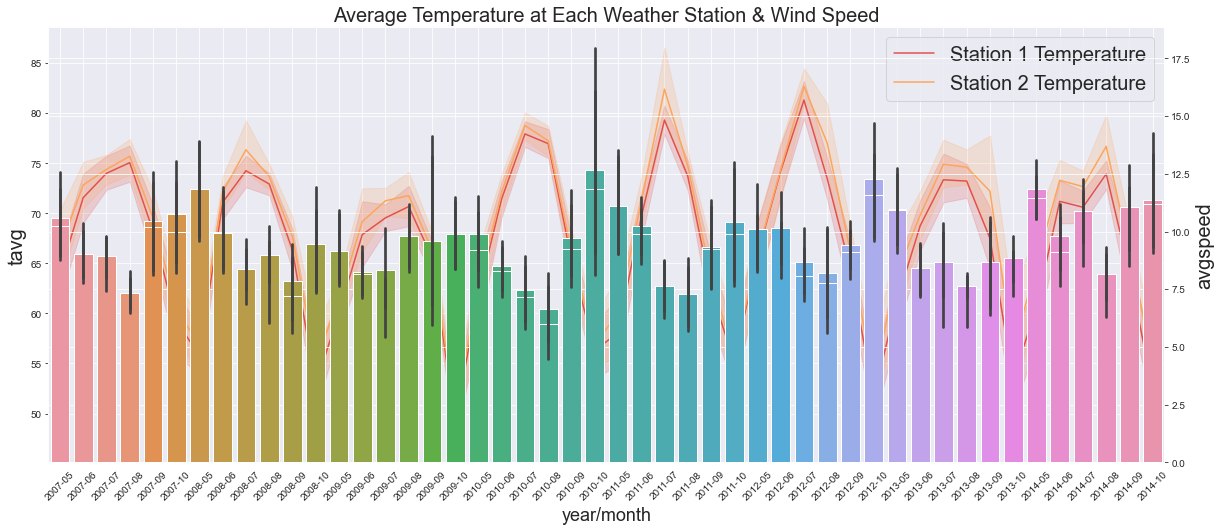

In [52]:
cross_comparison('tavg','avgspeed',"Average Temperature at Each Weather Station & Wind Speed")

It appears that avgspeed has negative correlation with temperature, across the years.

# Correlation Analysis between Weather and wnvpresent

We will want to perform a correlation analysis based on weather data that is averaged across a varying range of previous weeks' data. Since the data between the stations does not differ significantly, we'll proceed with using Station 2's data to perform the analysis.

In [53]:
# create function to add date ranges
def ccmgenerator(data, maxweeks=8):
    # Generate average temperature
    # Initialize counter
    n=1
    while n!=(maxweeks+1):
        for i in range(n, maxweeks+1):
            # Generate empty columns
            targettemp='avgtemp_week'+str(n)+'_'+str(i)
            targetlight='avglight_week'+str(n)+'_'+str(i)
            targethumid='avghumid_week'+str(n)+'_'+str(i)
            targetrain='avgrain_week'+str(n)+'_'+str(i)
            targetwind='avgwind_week'+str(n)+'_'+str(i)
            
            data[targettemp]=np.NaN
            data[targetlight]=np.NaN
            data[targethumid]=np.NaN
            data[targetrain]=np.NaN
            data[targetwind]=np.NaN
            
            # Filling in average temperature         
            for j in data.index.to_list():
            #for j in data.index:
                startdate = datetime.fromisoformat(data['date'][j])
                startpoint = startdate+timedelta(weeks=-(n))
                endpoint = startdate+timedelta(weeks=-(i))
                # Filling in average temperature  
                try:
                    data.loc[j,targettemp]=avgtemp(startpoint,endpoint)
                except:
                    pass
                # Fillng in average light
                try:
                    data.loc[j,targetlight]=avglight(startpoint,endpoint)
                except:
                    pass
                # Filling in average humid
                try:
                    data.loc[j,targethumid]=avghumid(startpoint,endpoint)
                except:
                    pass
                # Filling in average rain
                try:
                    data.loc[j,targetrain]=avgrain(startpoint,endpoint) 
                except:
                    pass
                # Filling in average wind
                try:
                    data.loc[j,targetwind]=avgwind(startpoint,endpoint)
                except:
                    pass
            
        n+=1
    return data

In [54]:
def avgtemp(startdate,enddate):
    datelist=[]
    delta = startdate-enddate
    for i in range(delta.days + 1):
        day = enddate + timedelta(days=i)
        datelist.append(day.date().isoformat())
    # Converting to celcius
    return (np.mean(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['tavg'])-32)*5/9              

def avghumid(startdate,enddate):
    datelist=[]
    delta = startdate-enddate
    for i in range(delta.days + 1):
        day = enddate + timedelta(days=i)
        datelist.append(day.date().isoformat())
    humidlist=[]

    # Relative Humidity formula where td = dewpoint temp and ta = average temp
    td=(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['dewpoint']-32)*5/9
    ta=(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['tavg']-32)*5/9
    return np.mean(100*(np.exp((17.625*td)/(243.04+td))/np.exp((17.625*ta)/(243.04+ta))))
    
def avglight(startdate,enddate):
    datelist=[]
    delta = startdate-enddate
    for i in range(delta.days + 1):
        day = enddate + timedelta(days=i)
        datelist.append(day.date().isoformat())
    # 
    return (np.mean(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['dayhrs']))      
    # 
    return (np.mean(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['dayhrs']))     

def avgwind(startdate,enddate):
    datelist=[]
    delta = startdate-enddate
    for i in range(delta.days + 1):
        day = enddate + timedelta(days=i)
        datelist.append(day.date().isoformat())
    # Converting to celcius
    return (np.mean(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['avgspeed']))  

def avgrain(startdate,enddate):
    datelist=[]
    delta = startdate-enddate
    for i in range(delta.days + 1):
        day = enddate + timedelta(days=i)
        datelist.append(day.date().isoformat())
    return (np.mean(weather.loc[(weather.date.isin(datelist)) & (weather['station']==2)]['preciptotal']))    

In [55]:
uniquedates=train[~train.duplicated(['date'],keep='last')]
uniquedataset=ccmgenerator(uniquedates, maxweeks=8)
uniquedataset.head(2)

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,multiplebins,year,month,week,day,weekdayname,dayofyear,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8
24,2007-05-29,CULEX RESTUANS,T159,41.732984,-87.649642,1,0,0,2007,5,22,29,Tuesday,149,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [56]:
test.head()

,id,date,species,trap,latitude,longitude,multiplebins,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
test.columns=test.columns.str.lower()
uniquedatestest=test[~test.duplicated(['date'],keep='last')]
uniquedatasettest=ccmgenerator(uniquedatestest, maxweeks=8)
uniquedatasettest.head(2)

,id,date,species,trap,latitude,longitude,multiplebins,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8
1207,1208,2008-06-11,CULEX ERRATICUS,T054C,41.925652,-87.63359,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.925652, -87.63359)",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [58]:
 ccmmask=['date','avgtemp_week1_1', 'avglight_week1_1', 'avghumid_week1_1', 'avgrain_week1_1',
 'avgwind_week1_1', 'avgtemp_week1_2', 'avglight_week1_2', 'avghumid_week1_2',
 'avgrain_week1_2', 'avgwind_week1_2', 'avgtemp_week1_3', 'avglight_week1_3',
 'avghumid_week1_3', 'avgrain_week1_3', 'avgwind_week1_3', 'avgtemp_week1_4',
 'avglight_week1_4', 'avghumid_week1_4', 'avgrain_week1_4', 'avgwind_week1_4',
 'avgtemp_week1_5', 'avglight_week1_5', 'avghumid_week1_5', 'avgrain_week1_5',
 'avgwind_week1_5', 'avgtemp_week1_6', 'avglight_week1_6', 'avghumid_week1_6',
 'avgrain_week1_6', 'avgwind_week1_6', 'avgtemp_week1_7', 'avglight_week1_7',
 'avghumid_week1_7', 'avgrain_week1_7', 'avgwind_week1_7', 'avgtemp_week1_8',
 'avglight_week1_8', 'avghumid_week1_8', 'avgrain_week1_8', 'avgwind_week1_8',
 'avgtemp_week2_2', 'avglight_week2_2', 'avghumid_week2_2', 'avgrain_week2_2',
 'avgwind_week2_2', 'avgtemp_week2_3', 'avglight_week2_3', 'avghumid_week2_3',
 'avgrain_week2_3', 'avgwind_week2_3', 'avgtemp_week2_4', 'avglight_week2_4',
 'avghumid_week2_4', 'avgrain_week2_4', 'avgwind_week2_4', 'avgtemp_week2_5',
 'avglight_week2_5', 'avghumid_week2_5', 'avgrain_week2_5', 'avgwind_week2_5',
 'avgtemp_week2_6', 'avglight_week2_6', 'avghumid_week2_6', 'avgrain_week2_6',
 'avgwind_week2_6', 'avgtemp_week2_7', 'avglight_week2_7', 'avghumid_week2_7',
 'avgrain_week2_7', 'avgwind_week2_7', 'avgtemp_week2_8', 'avglight_week2_8',
 'avghumid_week2_8', 'avgrain_week2_8', 'avgwind_week2_8', 'avgtemp_week3_3',
 'avglight_week3_3', 'avghumid_week3_3', 'avgrain_week3_3', 'avgwind_week3_3',
 'avgtemp_week3_4', 'avglight_week3_4', 'avghumid_week3_4', 'avgrain_week3_4',
 'avgwind_week3_4', 'avgtemp_week3_5', 'avglight_week3_5', 'avghumid_week3_5',
 'avgrain_week3_5', 'avgwind_week3_5', 'avgtemp_week3_6', 'avglight_week3_6',
 'avghumid_week3_6', 'avgrain_week3_6', 'avgwind_week3_6', 'avgtemp_week3_7',
 'avglight_week3_7', 'avghumid_week3_7', 'avgrain_week3_7', 'avgwind_week3_7',
 'avgtemp_week3_8', 'avglight_week3_8', 'avghumid_week3_8', 'avgrain_week3_8',
 'avgwind_week3_8', 'avgtemp_week4_4', 'avglight_week4_4', 'avghumid_week4_4',
 'avgrain_week4_4', 'avgwind_week4_4', 'avgtemp_week4_5', 'avglight_week4_5',
 'avghumid_week4_5', 'avgrain_week4_5', 'avgwind_week4_5', 'avgtemp_week4_6',
 'avglight_week4_6', 'avghumid_week4_6', 'avgrain_week4_6', 'avgwind_week4_6',
 'avgtemp_week4_7', 'avglight_week4_7', 'avghumid_week4_7', 'avgrain_week4_7',
 'avgwind_week4_7', 'avgtemp_week4_8', 'avglight_week4_8', 'avghumid_week4_8',
 'avgrain_week4_8', 'avgwind_week4_8', 'avgtemp_week5_5', 'avglight_week5_5',
 'avghumid_week5_5', 'avgrain_week5_5', 'avgwind_week5_5', 'avgtemp_week5_6',
 'avglight_week5_6', 'avghumid_week5_6', 'avgrain_week5_6', 'avgwind_week5_6',
 'avgtemp_week5_7', 'avglight_week5_7', 'avghumid_week5_7', 'avgrain_week5_7',
 'avgwind_week5_7', 'avgtemp_week5_8', 'avglight_week5_8', 'avghumid_week5_8',
 'avgrain_week5_8', 'avgwind_week5_8', 'avgtemp_week6_6', 'avglight_week6_6',
 'avghumid_week6_6', 'avgrain_week6_6', 'avgwind_week6_6', 'avgtemp_week6_7',
 'avglight_week6_7', 'avghumid_week6_7', 'avgrain_week6_7', 'avgwind_week6_7',
 'avgtemp_week6_8', 'avglight_week6_8', 'avghumid_week6_8', 'avgrain_week6_8',
 'avgwind_week6_8', 'avgtemp_week7_7', 'avglight_week7_7', 'avghumid_week7_7',
 'avgrain_week7_7', 'avgwind_week7_7', 'avgtemp_week7_8', 'avglight_week7_8',
 'avghumid_week7_8', 'avgrain_week7_8', 'avgwind_week7_8', 'avgtemp_week8_8',
 'avglight_week8_8', 'avghumid_week8_8', 'avgrain_week8_8', 'avgwind_week8_8']

In [59]:
uniquedataset.head(2)

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,multiplebins,year,month,week,day,weekdayname,dayofyear,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8
24,2007-05-29,CULEX RESTUANS,T159,41.732984,-87.649642,1,0,0,2007,5,22,29,Tuesday,149,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [60]:
newtrain=df.merge(uniquedataset[ccmmask],on='date',validate='m:m',suffixes=None)

In [61]:
newtrain

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,numbins,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8
0,2007-05-29,CULEX PIPIENS,T096,41.731922,-87.677512,1,0,2007-05-29,2007,5,22,29,Tuesday,149,"(41.731922, -87.677512)",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [62]:
newtrain=newtrain.fillna(newtrain.mean())

In [63]:
newtest=test.merge(uniquedatasettest[ccmmask],on='date',validate='m:m',suffixes=None)

In [64]:
newtrain.isnull()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,numbins,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [65]:
newtest.head(2)

,id,date,species,trap,latitude,longitude,multiplebins,timestamp,year,month,week,day,weekdayname,dayofyear,coordinates,culex pipiens,culex pipiens/restuans,culex restuans,t001,t002,t003,t004,t005,t006,t007,t008,t009,t011,t012,t013,t014,t015,t016,t017,t018,t019,t025,t027,t028,t030,t031,t033,t034,t035,t036,t037,t039,t040,t043,t044,t045,t046,t047,t048,t049,t050,t051,t054,t054c,t060,t061,t062,t063,t065,t066,t067,t069,t070,t071,t072,t073,t074,t075,t076,t077,t078,t079,t080,t081,t082,t083,t084,t085,t086,t088,t089,t090,t091,t092,t094,t094b,t095,t096,t097,t099,t100,t102,t103,t107,t114,t115,t128,t129,t135,t138,t141,t142,t143,t144,t145,t146,t147,t148,t149,t150,t151,t152,t153,t154,t155,t156,t157,t158,t159,t160,t161,t162,t200,t206,t209,t212,t215,t218,t219,t220,t221,t222,t223,t224,t225,t226,t227,t228,t229,t230,t231,t232,t233,t235,t236,t237,t238,t900,t903,avgtemp_week1_1,avglight_week1_1,avghumid_week1_1,avgrain_week1_1,avgwind_week1_1,avgtemp_week1_2,avglight_week1_2,avghumid_week1_2,avgrain_week1_2,avgwind_week1_2,avgtemp_week1_3,avglight_week1_3,avghumid_week1_3,avgrain_week1_3,avgwind_week1_3,avgtemp_week1_4,avglight_week1_4,avghumid_week1_4,avgrain_week1_4,avgwind_week1_4,avgtemp_week1_5,avglight_week1_5,avghumid_week1_5,avgrain_week1_5,avgwind_week1_5,avgtemp_week1_6,avglight_week1_6,avghumid_week1_6,avgrain_week1_6,avgwind_week1_6,avgtemp_week1_7,avglight_week1_7,avghumid_week1_7,avgrain_week1_7,avgwind_week1_7,avgtemp_week1_8,avglight_week1_8,avghumid_week1_8,avgrain_week1_8,avgwind_week1_8,avgtemp_week2_2,avglight_week2_2,avghumid_week2_2,avgrain_week2_2,avgwind_week2_2,avgtemp_week2_3,avglight_week2_3,avghumid_week2_3,avgrain_week2_3,avgwind_week2_3,avgtemp_week2_4,avglight_week2_4,avghumid_week2_4,avgrain_week2_4,avgwind_week2_4,avgtemp_week2_5,avglight_week2_5,avghumid_week2_5,avgrain_week2_5,avgwind_week2_5,avgtemp_week2_6,avglight_week2_6,avghumid_week2_6,avgrain_week2_6,avgwind_week2_6,avgtemp_week2_7,avglight_week2_7,avghumid_week2_7,avgrain_week2_7,avgwind_week2_7,avgtemp_week2_8,avglight_week2_8,avghumid_week2_8,avgrain_week2_8,avgwind_week2_8,avgtemp_week3_3,avglight_week3_3,avghumid_week3_3,avgrain_week3_3,avgwind_week3_3,avgtemp_week3_4,avglight_week3_4,avghumid_week3_4,avgrain_week3_4,avgwind_week3_4,avgtemp_week3_5,avglight_week3_5,avghumid_week3_5,avgrain_week3_5,avgwind_week3_5,avgtemp_week3_6,avglight_week3_6,avghumid_week3_6,avgrain_week3_6,avgwind_week3_6,avgtemp_week3_7,avglight_week3_7,avghumid_week3_7,avgrain_week3_7,avgwind_week3_7,avgtemp_week3_8,avglight_week3_8,avghumid_week3_8,avgrain_week3_8,avgwind_week3_8,avgtemp_week4_4,avglight_week4_4,avghumid_week4_4,avgrain_week4_4,avgwind_week4_4,avgtemp_week4_5,avglight_week4_5,avghumid_week4_5,avgrain_week4_5,avgwind_week4_5,avgtemp_week4_6,avglight_week4_6,avghumid_week4_6,avgrain_week4_6,avgwind_week4_6,avgtemp_week4_7,avglight_week4_7,avghumid_week4_7,avgrain_week4_7,avgwind_week4_7,avgtemp_week4_8,avglight_week4_8,avghumid_week4_8,avgrain_week4_8,avgwind_week4_8,avgtemp_week5_5,avglight_week5_5,avghumid_week5_5,avgrain_week5_5,avgwind_week5_5,avgtemp_week5_6,avglight_week5_6,avghumid_week5_6,avgrain_week5_6,avgwind_week5_6,avgtemp_week5_7,avglight_week5_7,avghumid_week5_7,avgrain_week5_7,avgwind_week5_7,avgtemp_week5_8,avglight_week5_8,avghumid_week5_8,avgrain_week5_8,avgwind_week5_8,avgtemp_week6_6,avglight_week6_6,avghumid_week6_6,avgrain_week6_6,avgwind_week6_6,avgtemp_week6_7,avglight_week6_7,avghumid_week6_7,avgrain_week6_7,avgwind_week6_7,avgtemp_week6_8,avglight_week6_8,avghumid_week6_8,avgrain_week6_8,avgwind_week6_8,avgtemp_week7_7,avglight_week7_7,avghumid_week7_7,avgrain_week7_7,avgwind_week7_7,avgtemp_week7_8,avglight_week7_8,avghumid_week7_8,avgrain_week7_8,avgwind_week7_8,avgtemp_week8_8,avglight_week8_8,avghumid_week8_8,avgrain_week8_8,avgwind_week8_8
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,0,2008-06-11,2008,6,24,11,Wednesday,163,"(41.95469, -87.800991)",0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Generating Correlation Heatmaps

In [66]:
def maskgen(colname,maxweeks=8):
    mask=[]
    n=1
    while n!=(maxweeks+1):
        for i in range(n,maxweeks+1):
            mask.append(colname+str(n)+'_'+str(i))
        n+=1
    return mask

In [67]:
avgtemp=maskgen('avgtemp_week')
avglight=maskgen('avglight_week')
avghumid=maskgen('avghumid_week')
avgrain=maskgen('avgrain_week')
avgwind=maskgen('avgwind_week')

In [68]:
def visualiser(column,target='nummosquitos',data=newtrain,suptitle="Time Lag"):
    series=data[column].corrwith(data[target],method='spearman')
    numlist=['1','2','3','4','5','6','7','8']
    tri=pd.DataFrame(index=numlist[::-1],columns=numlist)
    for i in range(0,len(series)):
        row=(series.index[i][-3])
        col=(series.index[i][-1])
        tri.loc[row,col]=float(series[i])
    tri=tri.fillna(0)
    mask=tri==0
    sns.heatmap(tri,mask=mask,cmap='coolwarm',annot_kws={"size": 8},annot=True).set_title(suptitle,fontsize=20)
    plt.xlabel('Time Lag 1',fontsize=13)
    plt.ylabel('Time Lag 2',fontsize=13);

**Description of Cross correlation maps:**
- CCMs depict the correlations (Spearman rank order correlation coeffcients) between culex. pipiens/restuans mosquito capture data and various weather factors. 
- The correlation coefficient for the week of the capture (0, 0) as well as the maximum of the lagged correlation coefficient (time lag 1, time lag 2) are given.

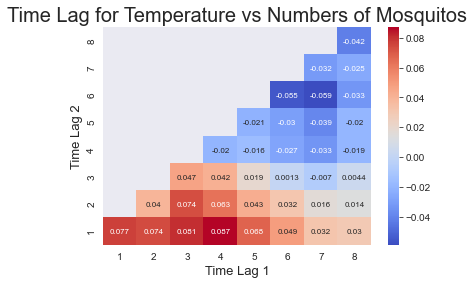

In [69]:
visualiser(avgtemp,suptitle='Time Lag for Temperature vs Numbers of Mosquitos')

We observe that temperature with a time lag of one week prior to capture of mosquitos would correlate to higher number of mosquitos. However, the coefficient coefficient is 0.13, which is small.

However, there is a clear trend that there is very little time lag for temperature vs. mosquitos captured, as most of the higher-ranged coefficients are concentrated at the lower range of weeks.

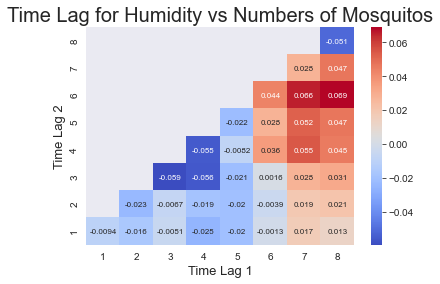

In [70]:
visualiser(avghumid ,suptitle='Time Lag for Humidity vs Numbers of Mosquitos')

Maximum correlation is small (max of scale is 0.05). No observable time-lag correlation can be observed for humidity.

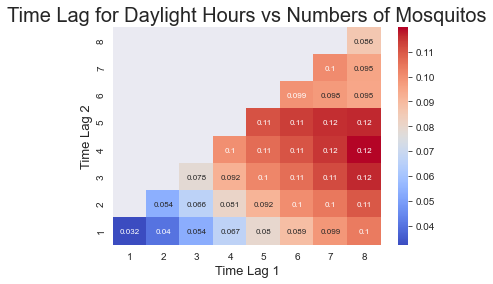

In [71]:
visualiser(avglight,suptitle='Time Lag for Daylight Hours vs Numbers of Mosquitos')

We observe that dayhours with a time lag of 4-8 weeks prior to capture of mosquitos would correlate to higher number of mosquitos. The correlation coefficient is at 0.14.

This basically shows us that a high average daylight hours approximately 1-2 months prior to capture would result in higher number of mosquitos being captured, on average. The time lag is 4-8 weeks for 'dayhours' effect to kick in.

There is a clear trend that a time lag of at least 8 weeks prior to having high dayhours increases the number of mosquitos captured.

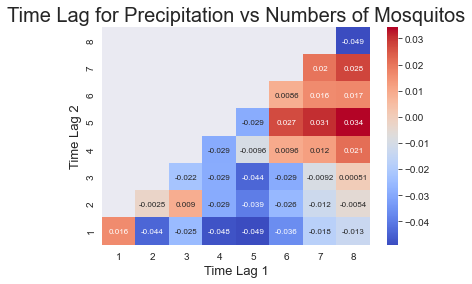

In [72]:
visualiser(avgrain,suptitle='Time Lag for Precipitation vs Numbers of Mosquitos')

Precipitation does not show us a clear trend in time lag correlation analysis. There are two distinct time lags (3 weeks prior and 7-8 weeks prior) that would result in highest number of mosquitos captured. However, coefficient of less than 0.1 shows that the correlation is really weak.

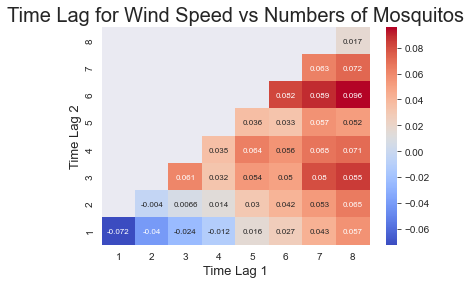

In [73]:
visualiser(avgwind,suptitle='Time Lag for Wind Speed vs Numbers of Mosquitos')

We observe that wind speed with a time lag of 7 weeks prior to capture of mosquitos would correlate to higher number of mosquitos. The correlation coefficient is at 0.13.

This basically shows us that a high average wind speed approximately 7 weeks prior to capture would result in higher number of mosquitos being captured, on average.

There is a clear trend that a time lag of at least 7 weeks prior to having high windspeed increases the number of mosquitos captured.

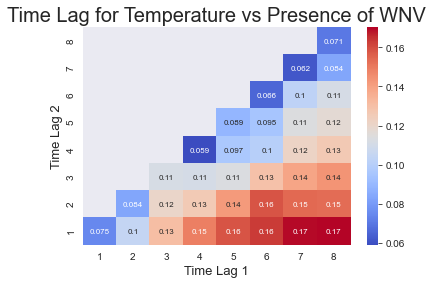

In [74]:
visualiser(avgtemp,target='wnvpresent',suptitle='Time Lag for Temperature vs Presence of WNV')

Again, there appears to be a distinct relationship between time lag for temperature and the presence of WNV tested within samples of mosquitos. 

The presence of WNV increases with higher rolling average of temperature across time. 

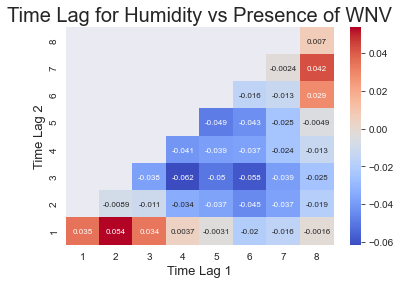

In [75]:
visualiser(avghumid,target='wnvpresent',suptitle='Time Lag for Humidity vs Presence of WNV')

No distinct correlations can be seen from the humidity correlation heatmap.

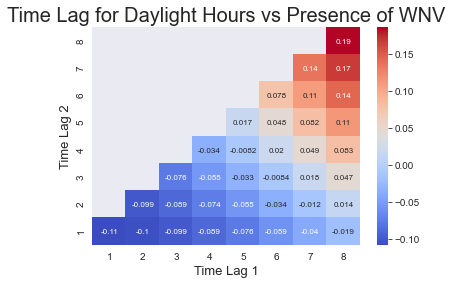

In [76]:
visualiser(avglight,target='wnvpresent',suptitle='Time Lag for Daylight Hours vs Presence of WNV')

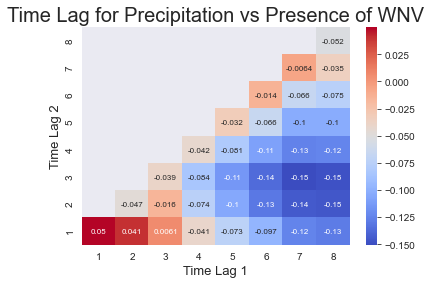

In [77]:
visualiser(avgrain,target='wnvpresent',suptitle='Time Lag for Precipitation vs Presence of WNV')

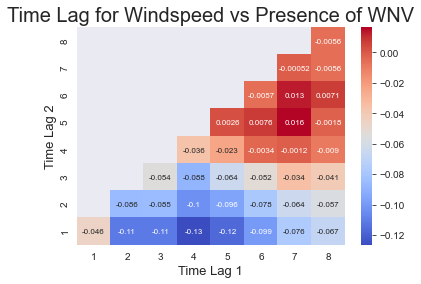

In [78]:
visualiser(avgwind,target='wnvpresent',suptitle='Time Lag for Windspeed vs Presence of WNV')

## Creating Processed Train Dataset for Modeling

In [79]:
df_final = pd.read_csv('../datasets/train_cleaned_modeling_ccm.csv')
df_final.shape

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/train_cleaned_modeling_ccm.csv'

In [ ]:
df_final['longitude'] = df_final['longitude'].map(lambda x: round(x, 2))
df_final['latitude'] = df_final['latitude'].map(lambda x: round(x, 2))
traps_clusters_train['longitude'] = traps_clusters_train['longitude'].map(lambda x: round(x, 2))
traps_clusters_train['latitude'] = traps_clusters_train['latitude'].map(lambda x: round(x, 2))

In [ ]:
## Generating dummies for Cluster IDs
df_final = df_final.merge(traps_clusters_train[['trap','latitude','longitude','ClusterIDs']], 
              on=['trap','latitude','longitude'], validate='m:m',how = 'left')
df_final.shape

In [ ]:
df_final['ClusterIDs'] = df_final['ClusterIDs'].map(lambda x: 'Cluster: '+ str(x))

In [ ]:
cluster_dummy = pd.get_dummies(df_final['ClusterIDs'])
df_final = pd.merge(df_final, cluster_dummy, right_index=True, left_index=True)

In [ ]:
# uncheck to re-save data
test_final = pd.read_csv('../datasets/test_cleaned_modeling_ccm.csv')
test_final.shape

In [ ]:
test_final['longitude'] = test_final['longitude'].map(lambda x: round(x, 2))
test_final['latitude'] = test_final['latitude'].map(lambda x: round(x, 2))
traps_clusters_test['longitude'] = traps_clusters_test['longitude'].map(lambda x: round(x, 2))
traps_clusters_test['latitude'] = traps_clusters_test['latitude'].map(lambda x: round(x, 2))

In [ ]:
test_final = pd.merge(test_final, traps_clusters_test[['trap','latitude','longitude','ClusterIDs']], 
              on=['trap','latitude','longitude'], validate='m:m',how = 'left')
test_final.shape

In [ ]:
test_final['ClusterIDs'] = test_final['ClusterIDs'].map(lambda x: 'Cluster: ' + str(x))

In [ ]:
cluster_t_dummy = pd.get_dummies(test_final['ClusterIDs'])
test_final = pd.merge(test_final, cluster_t_dummy, right_index=True, left_index=True)

# Exploring Spray Data

In [ ]:
spray = pd.read_csv('../datasets/spray_cleaned_eda.csv')

In [ ]:
spray.head()

In [ ]:
spray['date'] = pd.to_datetime(spray['date'])
spray.set_index('date', inplace=True)
spray.sort_index(inplace=True)

In [ ]:
spray.head()

In [ ]:
df = newtrain

In [ ]:
df.head()

In [ ]:
# Indexing date for easier
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

In [ ]:
df[df['wnvpresent']==0].shape

In [ ]:
df[df['wnvpresent']==1].shape

In [ ]:
# Assigning Coordinates

lats_spray = spray.latitude
longs_spray = spray.longitude
lats_train_0 = df[df['wnvpresent']==0].latitude
longs_train_0 = df[df['wnvpresent']==0].longitude
lats_train_1 = df[df['wnvpresent']==1].latitude
longs_train_1 = df[df['wnvpresent']==1].longitude

In [ ]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs_spray, y=lats_spray, c='y', s=0.5)
plt.scatter(x=longs_train_0, y=lats_train_0, c='b', s=20)
plt.scatter(x=longs_train_1, y=lats_train_1, c='r', s=20);
#plt.scatter(x=intersection[1], y=intersection[0], c='b', s=60, marker='s')

## Spray-train map 2011

In [ ]:
# Assigning Coordinates

train_2011 = df['2011']
lats_spray_2011 = spray['2011'].latitude
longs_spray_2011 = spray['2011'].longitude
lats_train_2011_0 = train_2011[train_2011['wnvpresent']==0].latitude
longs_train_2011_0 = train_2011[train_2011['wnvpresent']==0].longitude
lats_train_2011_1 = train_2011[train_2011['wnvpresent']==1].latitude
longs_train_2011_1 = train_2011[train_2011['wnvpresent']==1].longitude

In [ ]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs_spray_2011, y=lats_spray_2011, c='g', s=0.5)
plt.scatter(x=longs_train_2011_0, y=lats_train_2011_0, c='b', s=20)
plt.scatter(x=longs_train_2011_1, y=lats_train_2011_1, c='r', s=20);

## Spray-train map 2013

In [ ]:
# Assigning Coordinates

train_2013 = df['2013']
lats_spray_2013 = spray['2013'].latitude
longs_spray_2013 = spray['2013'].longitude
lats_train_2013_0 = train_2013[train_2013['wnvpresent']==0].latitude
longs_train_2013_0 = train_2013[train_2013['wnvpresent']==0].longitude
lats_train_2013_1 = train_2013[train_2013['wnvpresent']==1].latitude
longs_train_2013_1 = train_2013[train_2013['wnvpresent']==1].longitude

In [ ]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs_spray_2013, y=lats_spray_2013, c='y', s=0.5)
plt.scatter(x=longs_train_2013_0, y=lats_train_2013_0, c='b', s=20)
plt.scatter(x=longs_train_2013_1, y=lats_train_2013_1, c='r', s=20);

## Train map 2007 / 2009 

In [ ]:
# Assigning Coordinates


train_2007 = df['2007']
lats_train_2007_0 = train_2007[train_2007['wnvpresent']==0].latitude
longs_train_2007_0 = train_2007[train_2007['wnvpresent']==0].longitude
lats_train_2007_1 = train_2007[train_2007['wnvpresent']==1].latitude
longs_train_2007_1 = train_2007[train_2007['wnvpresent']==1].longitude

In [ ]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs_train_2007_0, y=lats_train_2007_0, c='b', s=20)
plt.scatter(x=longs_train_2007_1, y=lats_train_2007_1, c='r', s=20);

In [ ]:
# Assigning Coordinates

train_2009 = df['2009']
lats_train_2009_0 = train_2009[train_2009['wnvpresent']==0].latitude
longs_train_2009_0 = train_2009[train_2009['wnvpresent']==0].longitude
lats_train_2009_1 = train_2009[train_2009['wnvpresent']==1].latitude
longs_train_2009_1 = train_2009[train_2009['wnvpresent']==1].longitude

In [ ]:
# generate plot
plt.figure(figsize=(20,15))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
plt.scatter(x=longs_train_2009_0, y=lats_train_2009_0, c='b', s=20)
plt.scatter(x=longs_train_2009_1, y=lats_train_2009_1, c='r', s=20);

## Interactive Graph

In [ ]:
spray.head()

In [ ]:
spray['year'].value_counts()

### Understanding Spray Effectiveness

In [ ]:
df.head()

In [ ]:
# Function to plot traps by year
def plot_month_spray(month,yr):

############################################### TRAIN/SPRAY DATA ###############################################
    df_train = df[df['year'] == yr]
    df_spray = spray[spray['year'] == yr]
    if month != 'All':
        data_month_train = df_train[df_train['month'] == month]
        data_month_spray = df_spray[df_spray['month'] == month]
    elif month == 10:
        data_month_spray = df_spray[df_spray['month'] == 9]
    else:
        data_month_train = df_train
        data_month_spray = df_spray
        
    data_gb = data_month_train
    data_gb = data_month_train.groupby(['trap','latitude','longitude']).apply(trap_metrics).reset_index()
    
    lats = data_gb['latitude']
    longs = data_gb['longitude']
    lats_spray = data_month_spray['latitude']
    longs_spray = data_month_spray['longitude']
    
############################################### PLOTTING ###############################################
    plt.figure(figsize=(15,12))
    style = dict(size=12, weight='bold')
    
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.title('Number of Samples Drawn and Positive Samples for Each trap for Month ' + str(month) +  ' in '+ str(yr),fontsize=18);
    
    plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
    plt.scatter(x=longs, y=lats, c='w', s=data_gb['numbins']*5,label='No. of Bins of Mosquitos collected')
    plt.scatter(x=longs, y=lats, c='r', s=data_gb['wnvpresent']*5,label='WNV Present')
    plt.scatter(x=longs_spray, y=lats_spray, c='g', s=0.5,label='Spray Area')
       
    plt.legend();

In [ ]:
spray.groupby('year')['month'].unique()

In [ ]:
df.groupby('year')['month'].unique()

In [ ]:
# slider_month = [6,7,8,9,10, 'All']         
# slider_yr = [2011,2013]

slider_month = widgets.IntSlider(min=6, max=9, step=1, value=6)
slider_yr = widgets.RadioButtons(
    options=[2011,2013],
    value=2011, # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='year',
    disabled=False)

interact(plot_month_spray,month=slider_month,yr=slider_yr);

**Observation**
- Spray data were only captured in years 2011 and 2013.
- However, only a portion of the city was sprayed in late 2011 (September). The targeted area to be sprayed is amongst one of the biggest clusters observed in Chicago area.
- However, effectiveness of spray is observed to be positive in year 2013. 
    - There were many areas that were sprayed in August 2013. This was also the month with the highest number of mosquitos 
    - We observe a decrease in the number of bins of mosquitos collected from August to September, which is a positive after-effect of the spray. 
- A cross-comparison across both years (2011 and 2013) evidently showed that 2013 has a much higher presence of WNV present in traps than 2011. 